In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
file_path = '../final_data_with_predictions_4SD_2state_fixedzscore_3-28.csv'

raw_df = pd.read_csv(file_path)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (341,343,344,345,346) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_df.head()

,time,probeResp,rt,stimType,correct,logDelay,raw_index,baselineZMean,gazeXMean,gazeYMean,...,pre score,post score,raw change,% change,Time Offline - Visit Specific,Time Offline - Overall,Probability Offline - Overall,Probabily Offline - Visit Specific,MAAS,DRF
0,'2017-06-23 11:19:40.384',0,496,nonTarget,1,134,9316,-0.436473,508.502067,394.471383,...,12.0,12.0,0.0,0.000,0.587156,0.587156,0.560211,0.560211,4.50,32.0
1,'2017-06-23 11:15:42.574',0,398,nonTarget,1,144,2118,-2.357107,516.997927,349.489023,...,8.0,5.0,-3.0,-0.375,0.393548,0.431095,0.436247,0.405742,6.50,49.0
2,'2017-06-23 11:22:03.659',0,427,nonTarget,1,134,13652,0.288369,512.252263,385.265807,...,7.0,7.0,0.0,0.000,0.404959,0.375427,0.385973,0.390793,5.56,33.0
3,'2017-06-23 11:17:21.360',1,460,nonTarget,1,139,4904,-2.334264,515.187373,347.660967,...,4.0,3.0,-1.0,-0.250,NaN,NaN,NaN,NaN,5.31,33.0
4,'2017-06-23 11:44:35.459',0,481,nonTarget,1,130,54488,0.147267,506.310183,383.319450,...,10.0,8.0,-2.0,-0.200,0.419355,0.326975,0.349447,0.430161,6.31,36.0


In [4]:
raw_df.columns.tolist()

['time',
 'probeResp',
 'rt',
 'stimType',
 'correct',
 'logDelay',
 'raw_index',
 'baselineZMean',
 'gazeXMean',
 'gazeYMean',
 'qualityPsize',
 'AF3-ALPHA',
 'AF3-BETA',
 'AF3-DELTA',
 'AF3-SLOW',
 'AF3-THETA',
 'AF4-ALPHA',
 'AF4-BETA',
 'AF4-DELTA',
 'AF4-SLOW',
 'AF4-THETA',
 'AF7-ALPHA',
 'AF7-BETA',
 'AF7-DELTA',
 'AF7-SLOW',
 'AF7-THETA',
 'AF8-ALPHA',
 'AF8-BETA',
 'AF8-DELTA',
 'AF8-SLOW',
 'AF8-THETA',
 'AFZ-ALPHA',
 'AFZ-BETA',
 'AFZ-DELTA',
 'AFZ-SLOW',
 'AFZ-THETA',
 'C1-ALPHA',
 'C1-BETA',
 'C1-DELTA',
 'C1-SLOW',
 'C1-THETA',
 'C2-ALPHA',
 'C2-BETA',
 'C2-DELTA',
 'C2-SLOW',
 'C2-THETA',
 'C3-ALPHA',
 'C3-BETA',
 'C3-DELTA',
 'C3-SLOW',
 'C3-THETA',
 'C4-ALPHA',
 'C4-BETA',
 'C4-DELTA',
 'C4-SLOW',
 'C4-THETA',
 'C5-ALPHA',
 'C5-BETA',
 'C5-DELTA',
 'C5-SLOW',
 'C5-THETA',
 'C6-ALPHA',
 'C6-BETA',
 'C6-DELTA',
 'C6-SLOW',
 'C6-THETA',
 'CP1-ALPHA',
 'CP1-BETA',
 'CP1-DELTA',
 'CP1-SLOW',
 'CP1-THETA',
 'CP2-ALPHA',
 'CP2-BETA',
 'CP2-DELTA',
 'CP2-SLOW',
 'CP2-THETA',
 

In [5]:
# Fix column types

raw_df['rt'] = pd.to_numeric(raw_df['rt'], errors='coerce')

In [6]:
# create groupings

# group by predicted state
pred_state = raw_df.groupby(['predicted_state'])

# group by trial number
seg_num = raw_df.groupby(['segmentNumber'])

# group by participant number and predicted state
pnum_pred_state = raw_df.groupby(['participant_num', 'predicted_state'])

In [36]:
z = pnum_pred_state['rt'].mean()
np.sqrt(z.xs('offline', level='predicted_state').count())
sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [37]:
def participantStateMean(col_name):
    # average given column by participant-state pair index
    rt_mean = pnum_pred_state[col_name].mean()
    # return means/std for all participants for each state
    return {
        'online': {
            'mean': rt_mean.xs('online', level='predicted_state').mean(),
            'std': rt_mean.xs('online', level='predicted_state').std() / np.sqrt(rt_mean.xs('online', level='predicted_state').count())
        },
        'offline': {
            'mean': rt_mean.xs('offline', level='predicted_state').mean(),
            'std': rt_mean.xs('offline', level='predicted_state').std() / np.sqrt(rt_mean.xs('offline', level='predicted_state').count())
        }
    }

In [38]:
# calculate means for each state of each participant (seperately, as participant-state pairs)
state_cols_sorted = ['online', 'offline']

rt_vals = participantStateMean('rt')
baselineZMean_vals = participantStateMean('baselineZMean')

# now average those participant means by state
rt_means = [rt_vals[state]['mean'] for state in state_cols_sorted]
rt_stds = [rt_vals[state]['std'] for state in state_cols_sorted]

baseline_means = [baselineZMean_vals[state]['mean'] for state in state_cols_sorted]
baseline_stds = [baselineZMean_vals[state]['std'] for state in state_cols_sorted]



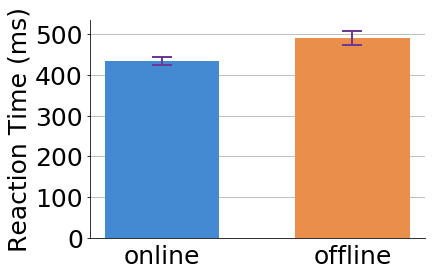

In [184]:
online_color = "#438AD2"
offline_color = "#E98F4B"
primary_color = "#6A3A96"
secondary_color = "#F1C45B"
other_color = "#9b7ab9"
elinewidth = 2
capsize = 10
capthick = 2
fs = 25
legendfs = 15

# plot mean RT online vs offline
x_axis = np.arange(len(state_cols_sorted))
bar_width = .6
plt.bar(x_axis, rt_means, bar_width, color=[online_color, offline_color])
plt.errorbar(x_axis, rt_means, yerr=rt_stds, fmt='none', color=primary_color, elinewidth=elinewidth, capsize=capsize, capthick=capthick)
# hide the x-ticks and label them
plt.tick_params(axis='both', bottom=False)
plt.xticks(x_axis, state_cols_sorted, fontsize=fs)
plt.yticks(fontsize=fs)
plt.grid(axis='y', zorder=-1000)
plt.rc('axes', axisbelow=True)
sns.despine()

plt.ylabel('Reaction Time (ms)', fontsize=fs)

plt.savefig('rt_mean.pdf', bbox_inches='tight')

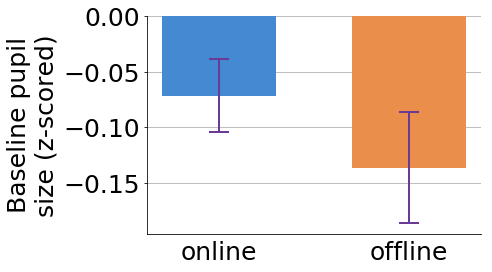

In [185]:
# plot mean baseline pupil size online vs offline
x_axis = np.arange(len(state_cols_sorted))
bar_width = 0.6

plt.bar(x_axis, baseline_means, bar_width, color=[online_color, offline_color])
plt.errorbar(x_axis, baseline_means, yerr=baseline_stds, fmt='none', color=primary_color, elinewidth=elinewidth, capsize=capsize, capthick=capthick)
# hide the x-ticks and label them
plt.tick_params(axis='both', bottom=False)

plt.grid(axis='y', zorder=-1000)
sns.despine(offset=0)

plt.ylabel('Baseline pupil\nsize (z-scored)', fontsize=fs)
plt.yticks(np.arange(0, -0.2, -0.05), fontsize=fs)
plt.xticks(x_axis, state_cols_sorted, fontsize=fs)

plt.savefig('psize_mean.pdf', bbox_inches='tight')

In [129]:
# need to exclude places where probe response was 0 (ie trials where they gave no response)
# pred_state['probeResp'].value_counts()

In [130]:
eeg_cols_sorted = ['FZ-' + band for band in ['BETA', 'ALPHA', 'THETA', 'DELTA', 'SLOW']]
eeg_cols = {
    'FZ-BETA': {
        'name': 'Beta (13-35Hz)'
    },
    'FZ-ALPHA': {
        'name': 'Alpha (8-12Hz)'
    },
    'FZ-THETA': {
        'name': 'Theta (4-7Hz)'
    },
    'FZ-DELTA': {
        'name': 'Delta (1-4Hz)',
    },
    'FZ-SLOW': {
        'name': 'Slow (<1Hz)'
    }
}

# For each eeg column, get it's online/offline mean and std
for col, name in eeg_cols.items():
    temp_res = participantStateMean(col)
    eeg_cols[col]['online'] = temp_res['online'] # pred_state[col].mean()
    eeg_cols[col]['offline'] = temp_res['offline'] # pred_state[col].std()

# flatten means and stdevs to arrays for online and offline
offline_eeg_means = [eeg_cols[col]['offline']['mean'] for col in eeg_cols_sorted]
offline_eeg_stds = [eeg_cols[col]['offline']['std'] for col in eeg_cols_sorted]

online_eeg_means = [eeg_cols[col]['online']['mean'] for col in eeg_cols_sorted]
online_eeg_stds = [eeg_cols[col]['online']['std'] for col in eeg_cols_sorted]

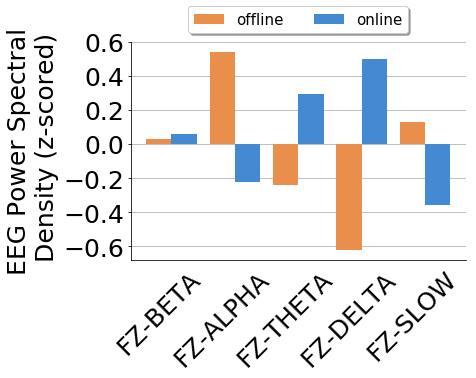

In [131]:
x_axis = np.arange(len(eeg_cols_sorted))
bar_width = 0.4
state_offset = 0.4
plt.bar(x_axis, offline_eeg_means, bar_width, label='offline', color=offline_color)
plt.bar(x_axis+state_offset, online_eeg_means, bar_width, label='online', color=online_color)
# hide the x-ticks and label them
plt.tick_params(axis='both', bottom=False)
plt.grid(axis='y', zorder=-1000)
plt.xticks(x_axis, eeg_cols_sorted, fontsize=fs, rotation=45)
sns.despine()

plt.legend(fontsize=legendfs, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fancybox=True, shadow=True)
plt.ylabel('EEG Power Spectral\n Density (z-scored)', fontsize=fs)
plt.yticks(fontsize=fs)

plt.savefig('eeg_state.pdf', bbox_inches='tight')

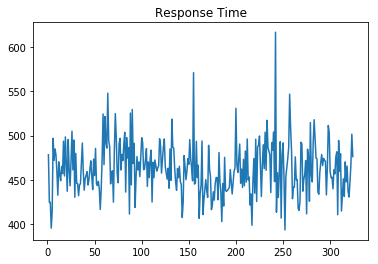

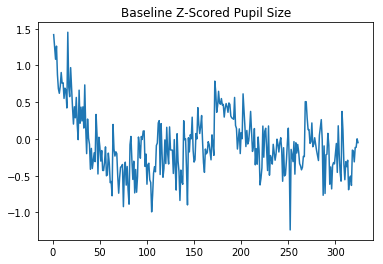

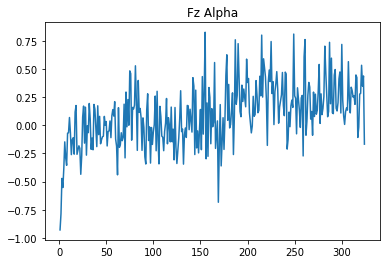

In [132]:
trial_plot_cols = {
    'rt': {
        'name': 'Response Time'
    },
    'baselineZMean': {
        'name': 'Baseline Z-Scored Pupil Size'
    },
    'FZ-ALPHA': {
        'name': 'Fz Alpha'
    }
}

for col, info in trial_plot_cols.items():
    plt.plot(seg_num[col].mean())
    plt.title(info['name'])
    plt.show()

In [133]:
fz_alpha_by_seg = seg_num['FZ-ALPHA'].mean()
fz_alpha_by_seg_rolled = fz_alpha_by_seg.rolling(window=10).mean()
baselineZMean_by_seg = seg_num['baselineZMean'].mean()
baselineZMean_by_seg_rolled = baselineZMean_by_seg.rolling(window=10).mean()
pct_online_by_seg = seg_num['predicted_state_num'].mean()
pct_online_by_seg_rolled = pct_online_by_seg.rolling(window=10).mean()

plot time series (average) of alpha power, pupil size, and predicted state %

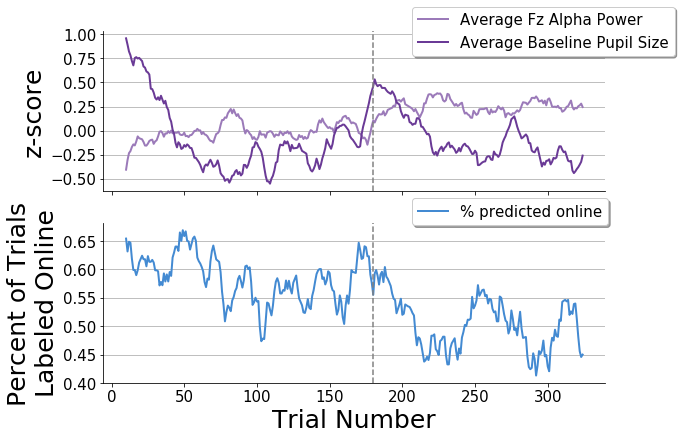

In [186]:
plt.figure(figsize=(9, 10))
plt.tight_layout()
linethick = 2
trialticksize = 15

ax1 = plt.subplot(311)
plt.plot(fz_alpha_by_seg_rolled, label='Average Fz Alpha Power', color=other_color, linewidth=linethick)
plt.plot(baselineZMean_by_seg_rolled, label='Average Baseline Pupil Size', color=primary_color, linewidth=linethick)
plt.axvline(180, linestyle='dashed', color='gray')
plt.setp(ax1.get_xticklabels(), visible=False) # make ticks invisible
plt.legend()
plt.grid(axis='y', zorder=-1000)
plt.ylabel('z-score', fontsize=fs)
plt.yticks(fontsize=trialticksize)
plt.legend(fontsize=legendfs, loc='upper left', bbox_to_anchor=(0.6, 1.2), ncol=1, fancybox=True, shadow=True)


ax2 = plt.subplot(312)
plt.plot(pct_online_by_seg_rolled, label='% predicted online', color=online_color, linewidth=linethick)
plt.axvline(180, linestyle='dashed', color='gray')
plt.ylabel('Percent of Trials\nLabeled Online', fontsize=fs)

plt.grid(axis='y', zorder=-1000)
plt.xlabel('Trial Number', fontsize=fs)
plt.yticks(fontsize=trialticksize)
plt.xticks(fontsize=trialticksize)

plt.legend(fontsize=legendfs, loc='upper left', bbox_to_anchor=(0.6, 1.2), ncol=2, fancybox=True, shadow=True)

sns.despine()

plt.savefig('psize_eeg_state_segment.pdf', bbox_inches='tight')

In [150]:
# map from response code to state
code_to_state = {
    '1': 'external unrelated',
    '2': 'internal unrelated',
    '3': 'not sure',
    '4': 'external related',
    '5': 'internal related'
}

# plot probe responses grouped by online/offline
# first remove the 0 valued probe responses
counting_col = 'raw_index'
probe_resp_df = raw_df.loc[raw_df['probeResp'] != 0,]

n_responses = len(probe_resp_df)
resp_counts = probe_resp_df.groupby(['probeResp', 'predicted_state']).agg({counting_col: 'count'})
resp_percent = resp_counts / n_responses * 100

# transform into dictionary
resp_counts_dict = {}
for idx, row in resp_percent.iterrows():
    state = idx[0]
    name = code_to_state[str(idx[0])]
    if not resp_counts_dict.get(state):
        resp_counts_dict[state] = {}
    resp_counts_dict[state][idx[1]] = row[counting_col]
    resp_counts_dict[state]['name'] = name

In [151]:
resp_counts_dict

{1: {'offline': 5.872193436960276,
  'name': 'external unrelated',
  'online': 8.635578583765112},
 2: {'offline': 21.761658031088082,
  'name': 'internal unrelated',
  'online': 19.516407599309154},
 3: {'offline': 2.763385146804836,
  'name': 'not sure',
  'online': 2.4179620034542317},
 4: {'offline': 5.526770293609672,
  'name': 'external related',
  'online': 13.126079447322972},
 5: {'offline': 9.844559585492227,
  'name': 'internal related',
  'online': 10.535405872193436}}

In [152]:
state_codes_sorted = range(1, 6)

online_percents = [resp_counts_dict[state_code]['online'] for state_code in state_codes_sorted]
offline_percents = [resp_counts_dict[state_code]['offline'] for state_code in state_codes_sorted]

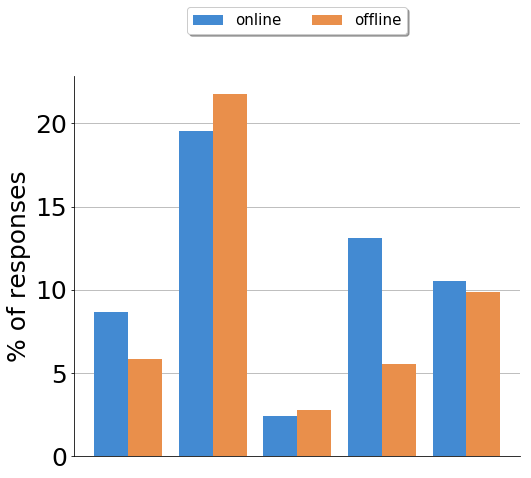

In [168]:
x_axis = np.arange(len(state_codes_sorted))

plt.figure(figsize=(8, 7))

bar_width = 0.4
state_offset = 0.4
plt.bar(x_axis, online_percents, bar_width, label='online', color=online_color)
plt.bar(x_axis+state_offset, offline_percents, bar_width, label='offline', color=offline_color)
# hide the x-ticks and label them
plt.tick_params(axis='both', bottom=False)
plt.grid(axis='y', zorder=-1000)
# not labeling x axis - will do that in poster...
# plt.xticks(x_axis-, [resp_counts_dict[code]['name'] for code in state_codes_sorted], rotation=45)
plt.xticks([])
plt.legend()
sns.despine()
plt.ylabel('% of responses', fontsize=fs)
plt.yticks(fontsize=fs)

plt.legend(fontsize=legendfs, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fancybox=True, shadow=True)

plt.savefig('resp_percent.pdf', bbox_inches='tight')